In [51]:
import pandas as pd
import matplotlib.pyplot as plt  # plot
import os
from os.path import join

path = ('archive/')
file = (path + 'labels.csv')
df = pd.read_csv(file)
df.head()

,Unnamed: 0,pth,label,relFCs
0,0,anger/image0000006.jpg,surprise,0.873142
1,1,anger/image0000060.jpg,anger,0.852311
2,2,anger/image0000061.jpg,anger,0.800957
3,3,anger/image0000066.jpg,disgust,0.843079
4,4,anger/image0000106.jpg,anger,0.849108


In [52]:
df.describe()

,Unnamed: 0,relFCs
count,28175.000000,28175.000000
mean,14087.000000,0.799247
std,8133.566253,0.058755
min,0.000000,0.516357
25%,7043.500000,0.766363
50%,14087.000000,0.809000
75%,21130.500000,0.842068
max,28174.000000,0.899951


In [53]:
df.hist

<bound method hist_frame of        Unnamed: 0                        pth     label    relFCs
0               0     anger/image0000006.jpg  surprise  0.873142
1               1     anger/image0000060.jpg     anger  0.852311
2               2     anger/image0000061.jpg     anger  0.800957
3               3     anger/image0000066.jpg   disgust  0.843079
4               4     anger/image0000106.jpg     anger  0.849108
...           ...                        ...       ...       ...
28170       28170  surprise/image0034960.jpg  surprise  0.825263
28171       28171  surprise/image0034961.jpg  surprise  0.738646
28172       28172  surprise/image0034966.jpg  surprise  0.774524
28173       28173  surprise/image0034973.jpg   neutral  0.766952
28174       28174  surprise/image0042075.jpg   disgust  0.832160

[28175 rows x 4 columns]>

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28175 entries, 0 to 28174
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  28175 non-null  int64  
 1   pth         28175 non-null  object 
 2   label       28175 non-null  object 
 3   relFCs      28175 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 880.6+ KB


In [55]:
import os
# Define an empty list
file_counts = []
def countFile(link):
    path = link
    num_files = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    file_counts.append(num_files)
    print(f"Number of files in directory {link} is ", num_files)

In [56]:
countFile("archive/happy")
countFile("archive/sad")
countFile("archive/surprise")
countFile("archive/anger")
countFile("archive/disgust")
countFile("archive/contempt")
countFile("archive/fear")
countFile("archive/neutral")

Number of files in directory archive/happy is  5044
Number of files in directory archive/sad is  3091
Number of files in directory archive/surprise is  4039
Number of files in directory archive/anger is  3218
Number of files in directory archive/disgust is  2477
Number of files in directory archive/contempt is  2871
Number of files in directory archive/fear is  3176
Number of files in directory archive/neutral is  5126


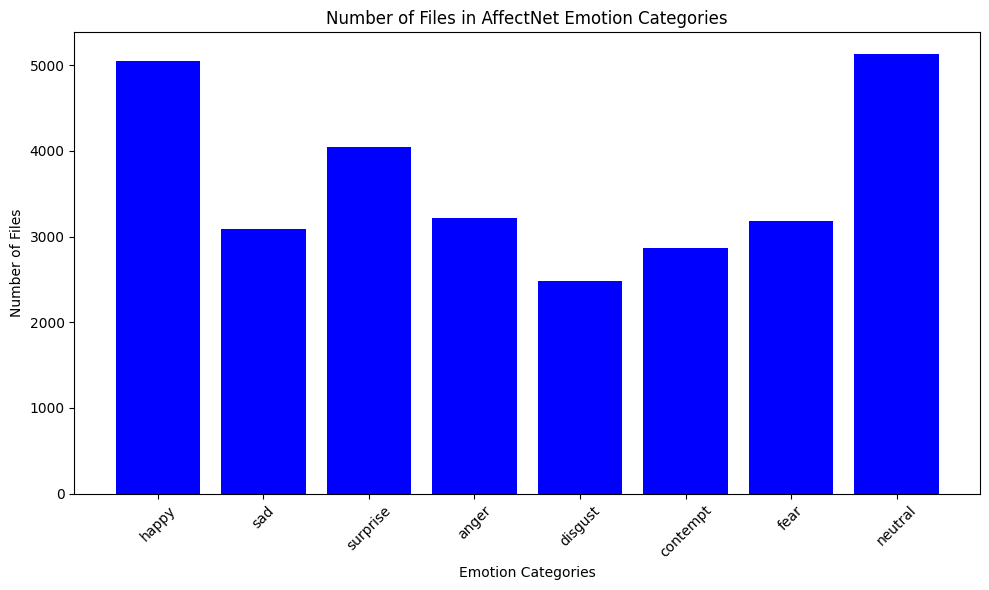

In [57]:
import matplotlib.pyplot as plt

# Data
categories = ['happy', 'sad', 'surprise', 'anger', 'disgust', 'contempt', 'fear', 'neutral']

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, file_counts, color='blue')
plt.xlabel('Emotion Categories')
plt.ylabel('Number of Files')
plt.title('Number of Files in AffectNet Emotion Categories')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

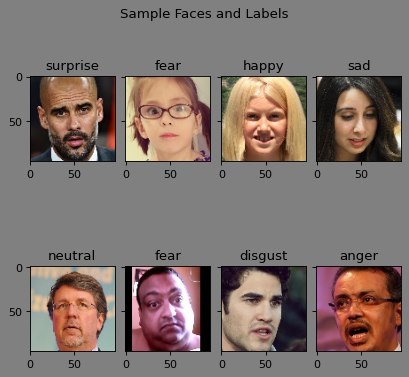

In [58]:
# display random images
import random
import cv2

fig, axs = plt.subplots(2, 4, sharey=True, constrained_layout=True, num=None, 
                        figsize=(5, 5), dpi=80, facecolor='gray', edgecolor='k')
fig.suptitle("Sample Faces and Labels")
axs = axs.flatten()

for i in range(8):
    idx = random.randint(0, len(df)-1)  # randomly select an index
    img_path = path + df['pth'][idx]
    img = cv2.imread(img_path)  # read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert to BGR to RGB
    axs[i].imshow(img)
    axs[i].set_title(df['label'][idx])

In [59]:

import os

INPUT_PATH = "archive/"
EMOTIONS = [f.name for f in os.scandir(INPUT_PATH) if f.is_dir()]
IMAGE_SIZE = (96, 96)

print(EMOTIONS)

['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [60]:

import cv2
import numpy as np
from keras.utils import to_categorical
import os

# def image_generator(input_path, emotions, image_size):
#     for index, emotion in enumerate(emotions):
#         for filename in os.listdir(os.path.join(input_path, emotion)):
#             img = cv2.imread(os.path.join(input_path, emotion, filename))
#             img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
#             yield img, index

# def load_images(input_path, emotions, image_size):
#     X, y = [], []
#     for img, label in image_generator(input_path, emotions, image_size):
#         X.append(img)
#         y.append(label)
#     X = np.array(X)
#     y = to_categorical(np.array(y))
#     return X, y

In [61]:
import numpy as np
from keras.utils import to_categorical
import os
import cv2

def image_generator(input_path, emotions, image_size):
    for index, emotion in enumerate(emotions):
        folder_path = os.path.join(input_path, emotion)
        image_files = os.listdir(folder_path)[:40]  # Take only 15 images

        for filename in image_files:
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)  # Read image
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert color
            yield img, index  # Yield image and its corresponding label

def load_images(input_path, emotions, image_size):
    X, y = [], []
    for img, label in image_generator(input_path, emotions, image_size):
        X.append(img)
        y.append(label)
    
    X = np.array(X)
    y = to_categorical(np.array(y))

    return X, y

In [62]:
# Load the images
X, y = load_images(INPUT_PATH, EMOTIONS, IMAGE_SIZE)
input_shape = X[0].shape
#input_shape = (96,96,1) 

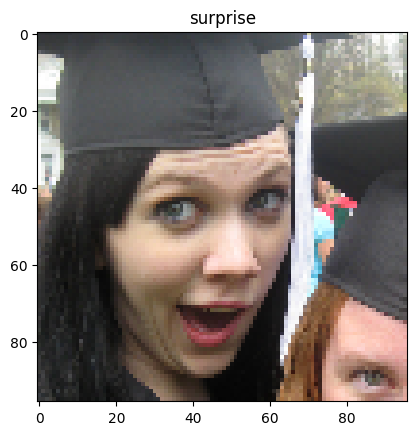

In [63]:
import matplotlib.pyplot as plt

# choose a random image index
idx = np.random.randint(len(X))

# display the image and its corresponding label from arrays
plt.imshow(X[idx])
plt.title(EMOTIONS[np.argmax(y[idx])])
plt.show()

In [64]:
# Train test split pre-processed data

from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [65]:
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, BatchNormalization, Flatten, Dense, MaxPool2D
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32, (3,3), activation="relu", input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.6))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 94, 94, 32)        896       
                                                                 
 batch_normalization_8 (Batc  (None, 94, 94, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 47, 47, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 47, 47, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 batch_normalization_9 (Batc  (None, 45, 45, 64)      

In [66]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

history = model.fit(X_train, y_train, batch_size=128,
                    epochs=10,
                    validation_data=(X_test, y_test),
                    
                    callbacks = [EarlyStopping(patience=10, monitor='val_loss', mode='min'), 
                                 ReduceLROnPlateau(monitor='val_loss', 
                                                   factor=0.5, 
                                                   patience=2, 
                                                   verbose=1),
                                 ModelCheckpoint('best_model.h5', 
                                                 save_best_only=True, 
                                                 save_weights_only=True, 
                                                 monitor='val_accuracy', 
                                                 mode='max')],
                    verbose=1)

Epoch 1/10
2/2 [==============================] - 6s 3s/step - loss: 5.2802 - accuracy: 0.1484 - val_loss: 6.0110 - val_accuracy: 0.1562 - lr: 0.0010
Epoch 2/10
2/2 [==============================] - 5s 3s/step - loss: 5.0349 - accuracy: 0.1719 - val_loss: 7.8583 - val_accuracy: 0.1406 - lr: 0.0010
Epoch 3/10
2/2 [==============================] - ETA: 0s - loss: 5.0548 - accuracy: 0.1758
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
2/2 [==============================] - 5s 3s/step - loss: 5.0548 - accuracy: 0.1758 - val_loss: 9.6300 - val_accuracy: 0.1406 - lr: 0.0010
Epoch 4/10
2/2 [==============================] - 5s 3s/step - loss: 4.9545 - accuracy: 0.1758 - val_loss: 9.1842 - val_accuracy: 0.1406 - lr: 5.0000e-04
Epoch 5/10
2/2 [==============================] - ETA: 0s - loss: 4.9488 - accuracy: 0.2188
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
2/2 [==============================] - 5s 2s/step - loss: 4.9488 - accu

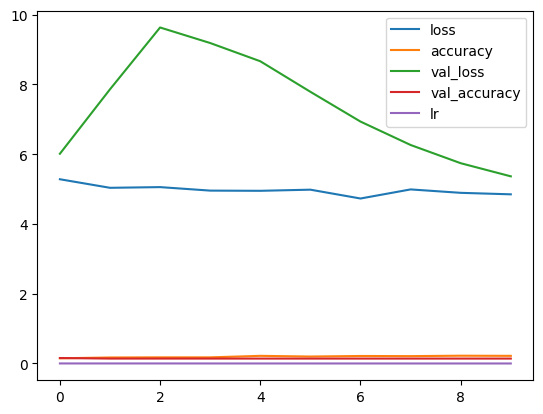

In [67]:
pd.DataFrame(history.history).plot();

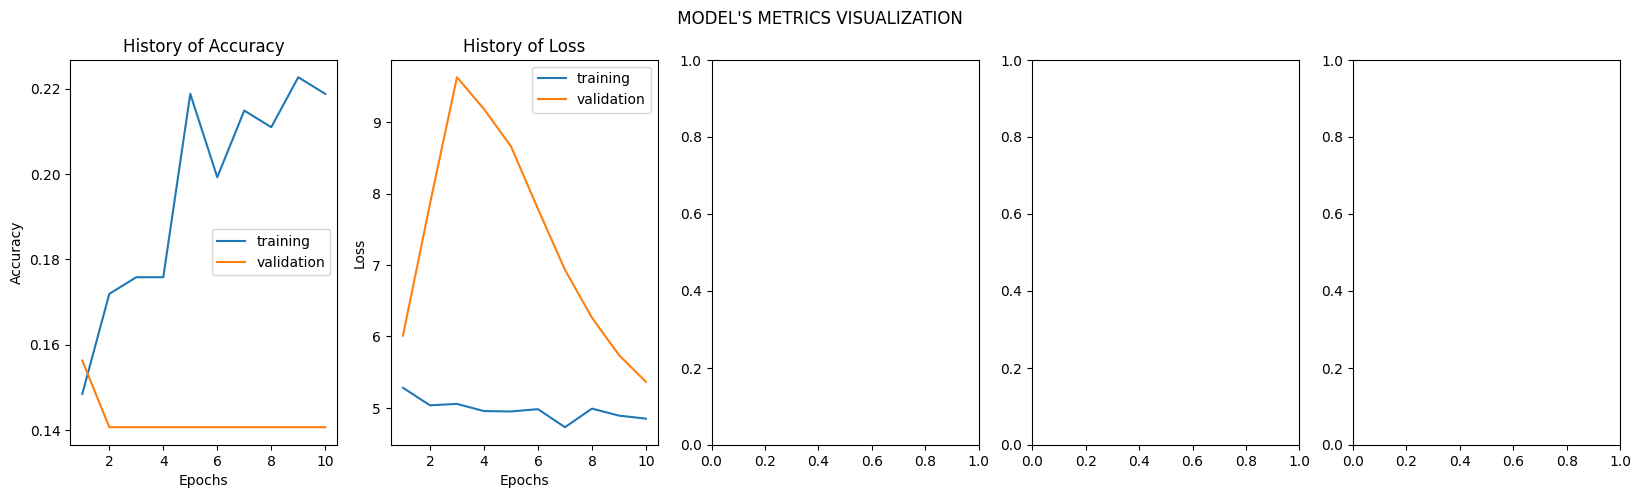

In [68]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(acc,val_acc,loss,val_loss):
    
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1,5, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    

    plt.show()
    

Train_Val_Plot(history.history['accuracy'],history.history['val_accuracy'],
               history.history['loss'],history.history['val_loss'],
              )

2/2 [==============================] - 1s 131ms/step


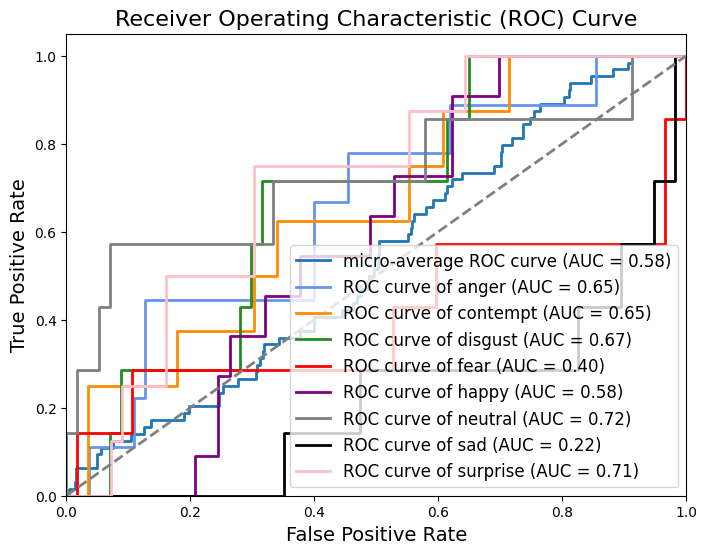

In [69]:

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(8):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = roc_auc_score(y_test, y_pred, multi_class='ovr')

plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr["micro"], tpr["micro"], lw=lw, label='micro-average ROC curve (AUC = {0:0.2f})'
                                                   ''.format(roc_auc["micro"]))
colors = ['cornflowerblue', 'darkorange', 'forestgreen', 'red', 'purple', 'gray', 'black', 'pink']
for i, color in zip(range(8), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of {0} (AUC = {1:0.2f})'.format(EMOTIONS[i], roc_auc[i]))
    
plt.plot([0, 1], [0, 1], color='gray', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.show()

In [70]:
from sklearn.metrics import classification_report

y_test_int = np.argmax(y_test, axis=1)

y_pred = model.predict(X_test)

y_pred_int = np.argmax(y_pred, axis=1)

print(classification_report(y_test_int, y_pred_int))

2/2 [==============================] - 0s 113ms/step
              precision    recall  f1-score   support

           0       0.14      1.00      0.25         9
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         8

    accuracy                           0.14        64
   macro avg       0.02      0.12      0.03        64
weighted avg       0.02      0.14      0.03        64



c:\Users\nikhi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nikhi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\nikhi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [71]:
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score,roc_curve,confusion_matrix
plt.figure(figsize=(10, 10))
cm=confusion_matrix(y_test_int, y_pred_int)
sns.heatmap(cm, annot=True)
plt.show()

ModuleNotFoundError: No module named 'seaborn'